In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import seaborn as sns
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression 
# from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
%matplotlib inline

In [5]:
df_1 = pd.read_csv('user1_data.csv')
df_2 = pd.read_csv('user2_data.csv')

/var/folders/qh/nmm9q9bs54x0q1jtj38dc8kw0000gn/T/ipykernel_42997/1787687489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_1.corr())


<AxesSubplot: >

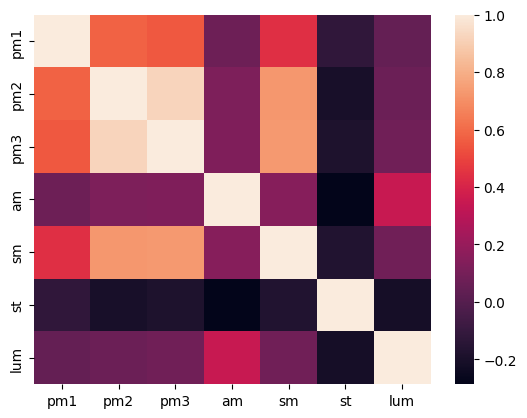

In [6]:
sns.heatmap(df_1.corr())

/var/folders/qh/nmm9q9bs54x0q1jtj38dc8kw0000gn/T/ipykernel_42997/1406772074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2.corr())


<AxesSubplot: >

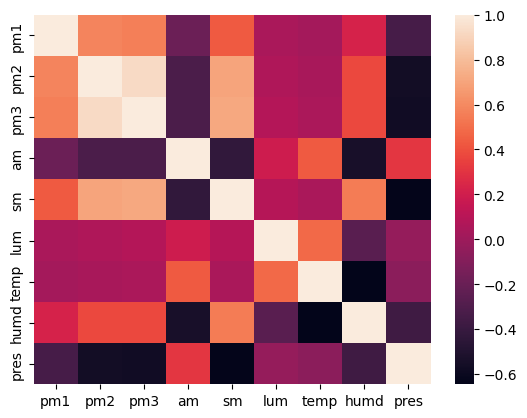

In [7]:
sns.heatmap(df_2.corr())

In [8]:
df_1.head()

,ttime,pm1,pm2,pm3,am,sm,st,lum
0,2022-07-18 15:42:55,3.63,0.0,0.0,3.2,7813.0,25.65,15001.0
1,2022-07-18 15:47:55,4.19,0.0,0.0,4.8,7692.0,25.66,13863.0
2,2022-07-18 15:52:55,4.74,0.0,0.0,4.0,7813.0,25.67,13788.0
3,2022-07-18 15:57:55,5.30,0.0,0.0,4.8,7813.0,25.68,14383.0
4,2022-07-18 16:02:55,0.55,5.3,5.3,3.2,7813.0,25.69,14621.0


In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19341 entries, 0 to 19340
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ttime   19341 non-null  object 
 1   pm1     19341 non-null  float64
 2   pm2     19341 non-null  float64
 3   pm3     19341 non-null  float64
 4   am      19341 non-null  float64
 5   sm      19341 non-null  float64
 6   st      19341 non-null  float64
 7   lum     19341 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.2+ MB


In [10]:
df_1.describe()

,pm1,pm2,pm3,am,sm,st,lum
count,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000
mean,1.610847,2.633942,60.393699,2.015076,4288.940593,26.852714,2714.784292
std,1.058214,1.293359,28.344044,2.280934,2901.962556,1.163759,4231.353590
min,0.550000,0.000000,0.000000,0.000000,286.000000,24.040000,0.000000
25%,0.550000,1.670000,38.550000,0.000000,541.000000,26.110000,1.000000
50%,1.110000,2.230000,51.400000,1.600000,6173.000000,26.700000,6.000000
75%,2.230000,3.350000,77.110000,3.200000,6667.000000,27.390000,4675.000000
max,6.700000,6.700000,153.660000,18.390000,7937.000000,31.170000,19288.000000


In [11]:
# Linear Regression

X = df_1.drop(['sm',"ttime"],axis=1)
y = df_1['sm']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)


#  Evaluation Metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1746.1936176175664
Root Mean Squared Error: 1931.6974186003104


In [12]:
# LGBM Regressor

from lightgbm import LGBMRegressor

horizon = 25
    
X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]


model = LGBMRegressor(random_state=42)
model.fit(X_train,y_train)
predictions=model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
## PLSRegression

from sklearn.cross_decomposition import PLSRegression 
model = PLSRegression(n_components=4)

horizon = 25

X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]

model.fit(X_train,y_train)
predictions=model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))

In [13]:
# Random Forest

from sklearn.model_selection import train_test_split


X = df_1.drop(['sm','ttime'], axis=1)
y = df_1['sm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X, y)
predictions = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))

Mean Absolute Error: 384.6741005487055
Mean Squared Error: 647.3186565621697


In [14]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg  

                 pm1       pm2        pm3        am          sm         st  \
timestamp                                                                    
2022-12-01  1.093529  1.670000  38.550000  1.070588  524.014706  26.182206   
2022-12-02  1.110000  1.670000  38.550000  1.298551  519.043478  26.363043   
2022-12-03  1.101515  1.670000  38.550000  1.115152  514.954545  27.007424   
2022-12-04  1.093284  1.653284  38.249104  1.408955  511.119403  27.090597   
2022-12-05  1.101515  1.619091  37.913636  1.721212  505.712121  26.999545   

                    lum  
timestamp                
2022-12-01  1995.264706  
2022-12-02  2954.840580  
2022-12-03  2084.606061  
2022-12-04  2507.731343  
2022-12-05  2873.121212  


/var/folders/qh/nmm9q9bs54x0q1jtj38dc8kw0000gn/T/ipykernel_42997/4142664243.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(df['timestamp'].dt.date).mean()


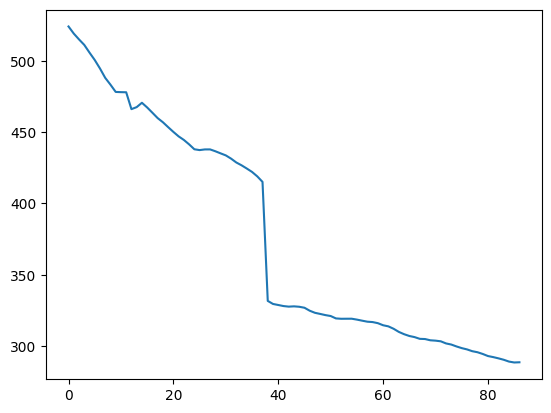

In [15]:
df = pd.read_csv("user1_data.csv")
df['date'] = pd.to_datetime(df['ttime'])
df = df.loc[(df['date'] > '2022-12-01') ]
df = df.reset_index(drop = True)
df.index.name = 'date'

df['timestamp'] = pd.to_datetime(df['ttime'])
df_grouped = df.groupby(df['timestamp'].dt.date).mean()


print(df_grouped.head())
feature_list = ['sm']
feature_list_len = len(feature_list)
values = df_grouped[feature_list].values
plt.plot(values[:, 0])
plt.show()

# Post December Plot

In [16]:
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
values = reframed.values
train = values[:int(0.8*(len(values))), :]
test = values[int(0.8*(len(values))):, :]

train_X, train_y = train[:, :-feature_list_len], train[:, -feature_list_len:]
test_X, test_y = test[:, :-feature_list_len], test[:, -feature_list_len:]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(68, 1, 1) (68, 1) (18, 1, 1) (18, 1)


Epoch 1/30


2023-04-28 17:32:48.708644: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 - 2s - loss: 0.3009 - mae: 0.4526 - val_loss: 0.0014 - val_mae: 0.0309 - 2s/epoch - 2s/step
Epoch 2/30
1/1 - 0s - loss: 0.2986 - mae: 0.4503 - val_loss: 0.0013 - val_mae: 0.0297 - 14ms/epoch - 14ms/step
Epoch 3/30
1/1 - 0s - loss: 0.2965 - mae: 0.4481 - val_loss: 0.0012 - val_mae: 0.0286 - 15ms/epoch - 15ms/step
Epoch 4/30
1/1 - 0s - loss: 0.2944 - mae: 0.4459 - val_loss: 0.0012 - val_mae: 0.0276 - 15ms/epoch - 15ms/step
Epoch 5/30
1/1 - 0s - loss: 0.2923 - mae: 0.4438 - val_loss: 0.0011 - val_mae: 0.0265 - 15ms/epoch - 15ms/step
Epoch 6/30
1/1 - 0s - loss: 0.2902 - mae: 0.4417 - val_loss: 0.0010 - val_mae: 0.0256 - 15ms/epoch - 15ms/step
Epoch 7/30
1/1 - 0s - loss: 0.2881 - mae: 0.4396 - val_loss: 9.3210e-04 - val_mae: 0.0247 - 15ms/epoch - 15ms/step
Epoch 8/30
1/1 - 0s - loss: 0.2860 - mae: 0.4376 - val_loss: 8.6582e-04 - val_mae: 0.0238 - 14ms/epoch - 14ms/step
Epoch 9/30
1/1 - 0s - loss: 0.2841 - mae: 0.4355 - val_loss: 8.0439e-04 - val_mae: 0.0231 - 16ms/epoch - 16ms/step
Epoc

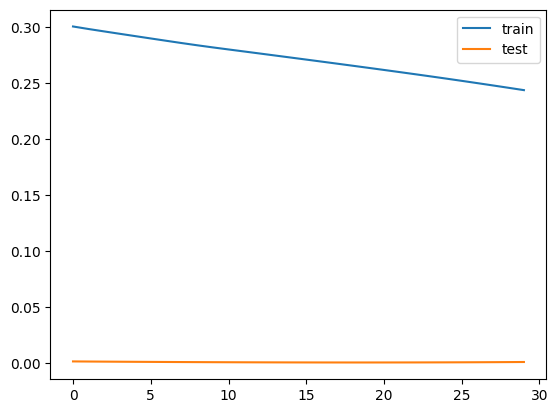

In [17]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(25, activation='relu', return_sequences=True))

model.add(Dense(feature_list_len))
model.compile(loss='mse', optimizer='adam', metrics='mae')
history = model.fit(train_X, train_y, epochs=30, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [18]:
yhat = model.predict(test_X)
yhat = yhat.reshape((-1, feature_list_len))
# # test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# # # invert scaling for forecast
# # inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(yhat)
inv_yhat = inv_yhat[:,0]

# # test_y = test_y.reshape((len(test_y), 1))
# # inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(test_y)
inv_y = inv_y[:,0]

1/1 [==============================] - 0s 166ms/step


In [19]:
rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.116


In [20]:
pred = []*len(test_X)
testing = train_X[-1]
testing = testing.reshape((1, 1, feature_list_len))
temp = model.predict(testing, verbose=0)
testing = temp[0].reshape((1, 1, feature_list_len))
for _ in range(len(test_X)):
    # print(testing)
    temp = model.predict(testing, verbose=0)
    pred.append(temp[0])
    testing = pred[-1].reshape((1, 1, feature_list_len))

In [21]:
pred = np.array(pred)
pred = pred.reshape((-1, feature_list_len))
pred = scaler.inverse_transform(pred)
pred = pred[:,0]
rmse = mean_squared_error(inv_y, pred, squared=False)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.264


In [22]:
pred = []*20
testing = test_X[-1]
testing = testing.reshape((1, 1, feature_list_len))
temp = model.predict(testing, verbose=0)
testing = temp[0].reshape((1, 1, feature_list_len))
for _ in range(20):
    temp = model.predict(testing, verbose=0)
    pred.append(temp[0])
    testing = pred[-1].reshape((1, 1, feature_list_len))

In [23]:
pred = np.array(pred)
pred = pred.reshape((-1, feature_list_len))
pred = scaler.inverse_transform(pred)
pred = pred[:,0]
print(pred)

[301.1253  301.13144 301.1316  301.1316  301.1316  301.1316  301.1316
 301.1316  301.1316  301.1316  301.1316  301.1316  301.1316  301.1316
 301.1316  301.1316  301.1316  301.1316  301.1316  301.1316 ]


In [24]:
#Final Prediction

In [25]:
train = values

train_X, train_y = train[:, :-feature_list_len], train[:, -feature_list_len:]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
print(train_X.shape, train_y.shape)

(86, 1, 1) (86, 1)


Epoch 1/30
1/1 - 1s - loss: 0.2396 - mae: 0.3657 - val_loss: 0.0014 - val_mae: 0.0310 - 1s/epoch - 1s/step
Epoch 2/30
1/1 - 0s - loss: 0.2377 - mae: 0.3634 - val_loss: 0.0013 - val_mae: 0.0298 - 15ms/epoch - 15ms/step
Epoch 3/30
1/1 - 0s - loss: 0.2359 - mae: 0.3614 - val_loss: 0.0013 - val_mae: 0.0288 - 16ms/epoch - 16ms/step
Epoch 4/30
1/1 - 0s - loss: 0.2342 - mae: 0.3595 - val_loss: 0.0012 - val_mae: 0.0278 - 17ms/epoch - 17ms/step
Epoch 5/30
1/1 - 0s - loss: 0.2325 - mae: 0.3577 - val_loss: 0.0011 - val_mae: 0.0268 - 17ms/epoch - 17ms/step
Epoch 6/30
1/1 - 0s - loss: 0.2309 - mae: 0.3559 - val_loss: 0.0010 - val_mae: 0.0259 - 16ms/epoch - 16ms/step
Epoch 7/30
1/1 - 0s - loss: 0.2294 - mae: 0.3542 - val_loss: 9.5843e-04 - val_mae: 0.0250 - 17ms/epoch - 17ms/step
Epoch 8/30
1/1 - 0s - loss: 0.2279 - mae: 0.3525 - val_loss: 8.9370e-04 - val_mae: 0.0241 - 17ms/epoch - 17ms/step
Epoch 9/30
1/1 - 0s - loss: 0.2264 - mae: 0.3508 - val_loss: 8.3338e-04 - val_mae: 0.0234 - 20ms/epoch - 20m

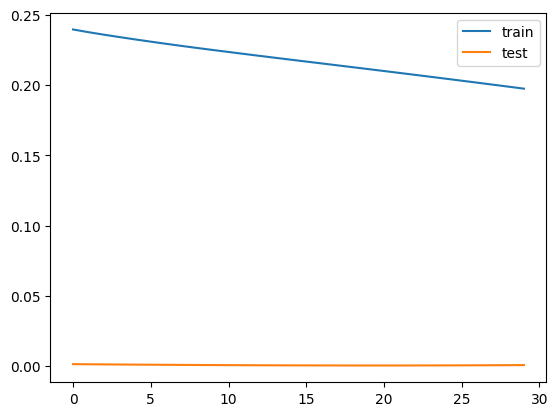

In [26]:
final_model = Sequential()
final_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
final_model.add(LSTM(25, activation='relu', return_sequences=True))

final_model.add(Dense(feature_list_len))
final_model.compile(loss='mse', optimizer='adam', metrics='mae')
history = final_model.fit(train_X, train_y, epochs=30, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [27]:
pred = []*20
testing = test_X[-1]
testing = testing.reshape((1, 1, feature_list_len))
temp = final_model.predict(testing, verbose=0)
testing = temp[0].reshape((1, 1, feature_list_len))
for _ in range(20):
    # print(testing)
    temp = final_model.predict(testing, verbose=0)
    pred.append(temp[0])
    testing = pred[-1].reshape((1, 1, feature_list_len))

In [28]:
pred = np.array(pred)
pred = pred.reshape((-1, feature_list_len))
pred = scaler.inverse_transform(pred)
pred = pred[:,0]
print(pred)

[300.1397  300.14343 300.1435  300.1435  300.1435  300.1435  300.1435
 300.1435  300.1435  300.1435  300.1435  300.1435  300.1435  300.1435
 300.1435  300.1435  300.1435  300.1435  300.1435  300.1435 ]
